In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import *
import astropy
from astropy import constants as ac
from astroquery.mast import Observations
import lightkurve

Following LightKurve tutorial example to make sure things are working :

First, we start Python and use the search_targetpixelfile function to obtain the Kepler pixel data for the star from the data archive:

( http://docs.lightkurve.org/tutorials/)

Lets try this for GJ1243

In [4]:
from lightkurve import search_targetpixelfile
gj1243 = search_targetpixelfile(9726699).download_all()

In [5]:
gj1243

TargetPixelFileCollection of 15 objects:
KeplerTargetPixelFile Object (ID: 9726699) 
KeplerTargetPixelFile Object (ID: 9726699) 
KeplerTargetPixelFile Object (ID: 9726699) 
KeplerTargetPixelFile Object (ID: 9726699) 
KeplerTargetPixelFile Object (ID: 9726699) 
KeplerTargetPixelFile Object (ID: 9726699) 
KeplerTargetPixelFile Object (ID: 9726699) 
KeplerTargetPixelFile Object (ID: 9726699) 
KeplerTargetPixelFile Object (ID: 9726699) 
KeplerTargetPixelFile Object (ID: 9726699) 
KeplerTargetPixelFile Object (ID: 9726699) 
KeplerTargetPixelFile Object (ID: 9726699) 
KeplerTargetPixelFile Object (ID: 9726699) 
KeplerTargetPixelFile Object (ID: 9726699) 
KeplerTargetPixelFile Object (ID: 9726699) 

In [6]:
#Looking just at quarter 1 in the Kepler data of GJ1243
gj1243_q1 = search_targetpixelfile(9726699,quarter=1).download()

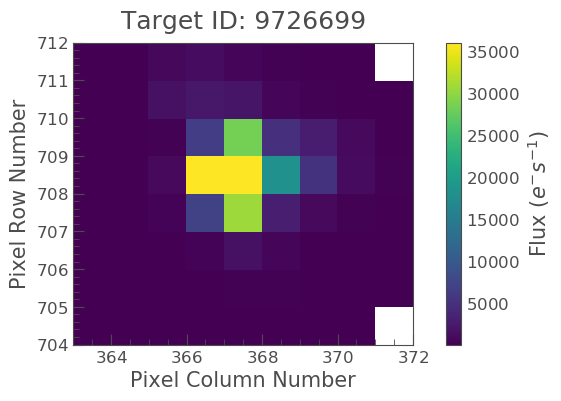

In [7]:
gj1243_q1.plot(frame=1)

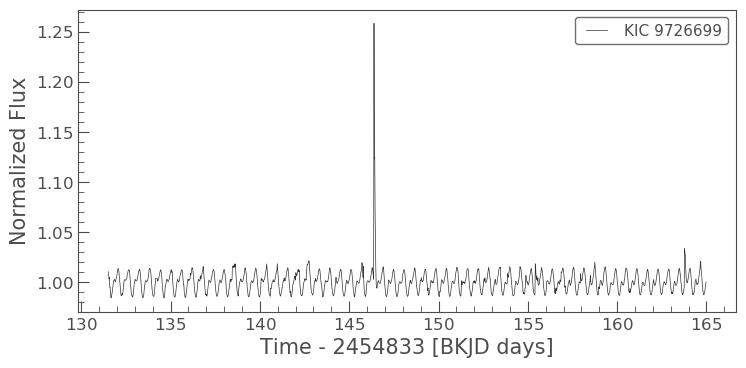

In [8]:
gj1243_q1_lc = gj1243_q1.to_lightcurve(aperture_mask='all');
gj1243_q1_lc.plot()

In [9]:
#when figuring where the flares are use a timestamp range (don't use ==)
#use short cadence data implement flag
#make the full light curve (stack the quarters)
#get rid of quarter to quarter variations

Following the tutorial for how to make a full light curve with all of the quarters of data

Now lets try this for GJ1243

In [12]:
from lightkurve import search_lightcurvefile
from lightkurve import search_targetpixelfile
gj1243_q1 = search_targetpixelfile(9726699,quarter=1).download()
target = '9726699'

In [13]:
print(target)
print(gj1243_q1)

9726699
KeplerTargetPixelFile Object (ID: 9726699)


In [14]:
lcf = search_lightcurvefile(9726699, quarter=4,cadence='short').download()

/Users/lupitatovar/anaconda3/lib/python3.7/site-packages/lightkurve/search.py:134: LightkurveWarning: Cannot download from an empty search result.
  LightkurveWarning)


In [15]:
gj1243lc = search_lightcurvefile(9726699,cadence='short').download_all()
print (gj1243lc)

LightCurveFileCollection of 11 objects:
KeplerLightCurveFile(ID: 9726699) 
KeplerLightCurveFile(ID: 9726699) 
KeplerLightCurveFile(ID: 9726699) 
KeplerLightCurveFile(ID: 9726699) 
KeplerLightCurveFile(ID: 9726699) 
KeplerLightCurveFile(ID: 9726699) 
KeplerLightCurveFile(ID: 9726699) 
KeplerLightCurveFile(ID: 9726699) 
KeplerLightCurveFile(ID: 9726699) 
KeplerLightCurveFile(ID: 9726699) 
KeplerLightCurveFile(ID: 9726699) 



In [16]:
for q in range(2,17):
    try:
        gj1243lc = gj1243lc.append(search_lightcurvefile(target, quarter=q,cadence=
                                                        'short').download().PDCSAP_FLUX)
    except:
            print(q)

/Users/lupitatovar/anaconda3/lib/python3.7/site-packages/lightkurve/search.py:134: LightkurveWarning: Cannot download from an empty search result.
  LightkurveWarning)


2


/Users/lupitatovar/anaconda3/lib/python3.7/site-packages/lightkurve/search.py:134: LightkurveWarning: Cannot download from an empty search result.
  LightkurveWarning)


3


/Users/lupitatovar/anaconda3/lib/python3.7/site-packages/lightkurve/search.py:134: LightkurveWarning: Cannot download from an empty search result.
  LightkurveWarning)


4


/Users/lupitatovar/anaconda3/lib/python3.7/site-packages/lightkurve/search.py:134: LightkurveWarning: Cannot download from an empty search result.
  LightkurveWarning)


5
7
8
9
10
11
12
13
14
15
16


/Users/lupitatovar/anaconda3/lib/python3.7/site-packages/lightkurve/search.py:142: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  LightkurveWarning)


In [29]:
gj1243lc[0].PDCSAP_FLUX.scatter();
#this is long cadence data 
#we need short cadence (~11mo)

AttributeError: 'NoneType' object has no attribute 'scatter'

In [30]:
for k in range(len(gj1243lc)):
    gj1243lc[k].PDCSAP_FLUX.scatter();

TypeError: object of type 'NoneType' has no len()

In [31]:
print(q)

16


In [20]:
gj1243lc_sum = gj1243lc[0].PDCSAP_FLUX

TypeError: 'NoneType' object is not subscriptable

In [23]:
for k in range(1,len(gj1243lc)):
    gj1243lc_sum = gj1243lc_sum.append(gj1243lc[k].PDCSAP_FLUX)

TypeError: object of type 'NoneType' has no len()

In [22]:
gj1243lc_sum.scatter()

NameError: name 'gj1243lc_sum' is not defined